In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("movies.csv") 

In [3]:

movies.head(30)


,Movie Title,Runtime,Genre,Award Wins,Award Nominations,Box Office
0,Parasite,132,"Comedy, Drama, Horror",308,271,53369749
1,Green Book,130,"Biography, Comedy, Drama",59,124,85080171
2,The Shape of Water,123,"Drama, Fantasy, Romance",138,358,63859435
3,Moonlight,111,Drama,228,296,27854932
4,Spotlight,129,"Biography, Crime, Drama",124,143,45055776
5,Birdman or (The Unexpected Virtue of Ignorance),119,"Comedy, Drama",193,292,42340598
6,12 Years a Slave,134,"Biography, Drama, History",242,337,56671993
7,Argo,120,"Biography, Drama, Thriller",94,156,136025503
8,The Artist,100,"Comedy, Drama, Romance",162,204,44671682
9,The King's Speech,118,"Biography, Drama, History",108,206,138797449


# (Graph) What was the runtime for each movie?

In [4]:
# Birdman is to long for line graph
movies['Movie Title'] = movies['Movie Title'].replace(['Birdman or (The Unexpected Virtue of Ignorance)'],'Birdman')

Text(0.5, 1.0, 'Runtimes per Movie')

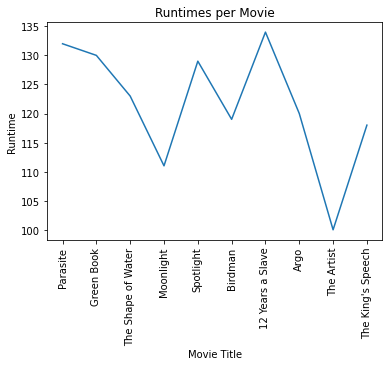

In [5]:
sns.lineplot(data=movies, x= 'Movie Title', y='Runtime')
#labels for x & y axis
plt.xlabel('Movie Title')
plt.xticks(rotation = 90)
plt.ylabel('Runtime')
 
# title of plot
plt.title('Runtimes per Movie')


# What movie had the longest runtime?

In [6]:
longest = movies.sort_values(by=['Runtime'], ascending=False)

longest.head()

,Movie Title,Runtime,Genre,Award Wins,Award Nominations,Box Office
6,12 Years a Slave,134,"Biography, Drama, History",242,337,56671993
0,Parasite,132,"Comedy, Drama, Horror",308,271,53369749
1,Green Book,130,"Biography, Comedy, Drama",59,124,85080171
4,Spotlight,129,"Biography, Crime, Drama",124,143,45055776
2,The Shape of Water,123,"Drama, Fantasy, Romance",138,358,63859435


### The movie with the longest runtime is 12 years a slave with 134 min

# Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

<AxesSubplot:xlabel='Runtime', ylabel='Award Wins'>

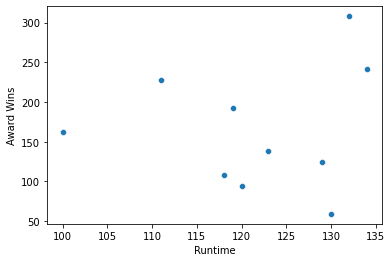

In [7]:
# calclulate scatterplot
sns.scatterplot(data=movies, x="Runtime", y= "Award Wins")

In [8]:
# calclulate  correlation coefficient
movies.corr()

,Runtime,Award Wins,Award Nominations,Box Office
Runtime,1.000000,0.117710,0.038617,0.083801
Award Wins,0.117710,1.000000,0.659688,-0.586839
Award Nominations,0.038617,0.659688,1.000000,-0.433469
Box Office,0.083801,-0.586839,-0.433469,1.000000


### NO!!! the graphic shows that there is no corrilation bewtween runtime and wins
###  the correlation coefficient is only: 0.0.117710

# (Graph) How many awards and nominations did each movie receive?

In [9]:
# format the dataframe -> so we can use it for the stacked barchart
awards_nom = movies.drop(['Runtime','Genre','Box Office'], axis=1)
awards_nom =awards_nom.set_index('Movie Title')


awards_nom.head(15)

,Award Wins,Award Nominations
Movie Title,,
Parasite,308,271
Green Book,59,124
The Shape of Water,138,358
Moonlight,228,296
Spotlight,124,143
Birdman,193,292
12 Years a Slave,242,337
Argo,94,156
The Artist,162,204


Text(0.5, 1.0, 'Awards and Nominations')

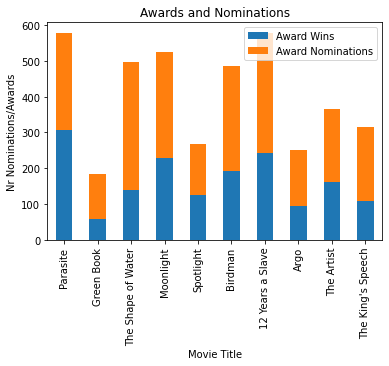

In [11]:
# create stacked bar chart for Awards and Nominations by 
awards_nom.plot(kind='bar', stacked=True)
 
# labels for x & y axis
plt.xlabel('Movie Title')
plt.ylabel('Nr Nominations/Awards')
 
# title of plot
plt.title('Awards and Nominations')

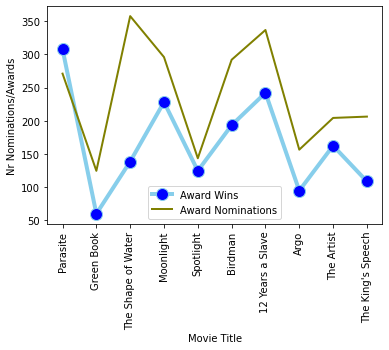

In [15]:
# multiple line plots
plt.plot( 'Movie Title', 'Award Wins', data=movies, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Movie Title', 'Award Nominations', data=movies, marker='', color='olive', linewidth=2)

# labels for x & y axis
plt.xlabel('Movie Title')
plt.ylabel('Nr Nominations/Awards')
plt.xticks(rotation = 90)

# show legend
plt.legend()

# show graph
plt.show()